In [1]:
#importing the libraries
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

#importing the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#adding the parameters in the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

#converting the data into useable format
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#compiling and fitting the data in model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

#calculating accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

#saving the model
model.save('mnist.h5')

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [2]:
#evalutaing the model on test dataset
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 194us/step


[0.03358749564248665, 0.9908000230789185]

3


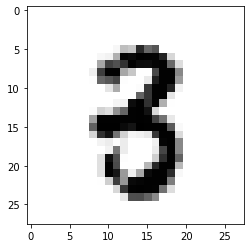

In [3]:
#visualizing the model performance
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 2853
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
predict = test_images[image_index].reshape(28,28)
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())